In [14]:
import fiona
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import Point, Polygon
from shapely.geometry import shape, mapping
import numpy as np
import geoplot as gplt
import seaborn as sns
import folium 
!pip install -U folium

Requirement already up-to-date: folium in /Users/eva/anaconda3/lib/python3.7/site-packages (0.11.0)


In [15]:

from folium.plugins import MarkerCluster


In [16]:
### plotting virtual maps from fieldmove data files
### Building Geopandas dataframes and importing shapefiles
pd.set_option('display.max_rows', 300)

## read in .csv as pandas dataframe
df16 = pd.read_csv('polylineBD16.csv')
df17 = pd.read_csv('polylineBD17.csv')
df14 = pd.read_csv('polylineBD14.csv')
df21 = pd.read_csv('polylineBD21.csv')
df22 = pd.read_csv('polylineBD22.csv')
gf02 = pd.read_csv('polylineGF02.csv')
gf04 = pd.read_csv('polylineGF04.csv')
gf06 = pd.read_csv('polylineGF06.csv')
gf07 = pd.read_csv('polylineGF07.csv')

def setUpDf(df):
    df = df.rename(columns={' latitude': 'lat'})
    df  = df.rename(columns={' longitude': 'lon'})
    return df 

df16 = setUpDf(df16)
df17 = setUpDf(df17)
df14 = setUpDf(df14)
df21 = setUpDf(df21)
df22 = setUpDf(df22)
gf02 = setUpDf(gf02)
gf04 = setUpDf(gf04)
gf06 = setUpDf(gf06)
gf07 = setUpDf(gf07)

## load shapefile
shp_sd = gpd.read_file('geo_export_e21612ee-1948-49ab-a925-adaad6bfb384.shp')
coords = df16[['lat', 'lon']].values
geom = gpd.points_from_xy(df16['lat'], df16['lon'])
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(coords, crs=crs, geometry=geom)

In [17]:
df16 = df16.append(df17)
df16 = df16.append(df14)
df16 = df16.append(df21)
df16 = df16.append(gf02)
df16 = df16.append(gf04)
df16 = df16.append(gf06)
df16 = df16.append(gf07)
df16 = df16.append(df22)

In [18]:
time_day = ['f5316996f8d6216e62c4bce1e2d3106f','fb796d2af9a9ceac1af2abd0f11d50cd', '0da0c749d056654b623b702d9ad955c0',
                                    'c8077b0827755fed412849d90ec1f25e', '1885a92e5957b5c4df1eaae847fbcc10' ,
                                     '1a3ba63344652c13e1f52b02a77b84c1', '2d75189178b4534952ce37d3b66857a5',
                                    '4c68fbbf61481e489119d4aa2e9f224a', 'b7476c851eb37d87e2da44898135108d',
                                     '8a1335ba8928417e2e04c2f2eeb85a3e', '842349063110c9f809b5943b0bb5e881',
                                     '73b7f7257e80287051790b6953862653','4dcf308682aa32dd08b6e82588c9219b',
                                     'fa8be4b3a2409a2cd0d6d7c6e06d8c38', 'c17f7f2893467f9d69d476ab723e738d',
                                     '5a75346378e55b4e77897bf8f8c9bde1','bc5494b3e7f3f5d10d9f6bc1ccf2f782', 
                                     'a719b484f28e4db65508e3f08467bb19','6cc9e540be42db0d68d4faf2e456ece6',
                                     '35d697504d48249ca478259d2d452bc3','2556a09df6c9f30bc41fcecbb69537e9',
                                     '690bea1de9f740ca561d1cc4192f8a80','520d2457505b30d9e7f35cec934ee0ed']

safe = ['1de101a7d80f6d96a0197497abbadf10', '113660399fd7fbc159ba8cd6781a7d37',  'f475ddc15bb32fda936e159262634568',
                                        '8edb8fe4a0e5c52bdc5402a3a0f6b61e''7879adf1b94ec9ba143c77b63e50ae41','4336081201b1d3a31bd9a34f192bafda', 'ae1e572f586ee4478da0d8bc4b5dc35d','fd755fdc3856fff6edfe6017a0d5de97', 'b9a774d58265ad4d8616df03795c5670'
                                        , 'cefb4a26a7cd2cc7fe73b49cd2417b30', '1de101a7d80f6d96a0197497abbadf10', '113660399fd7fbc159ba8cd6781a7d37',
                                        'f475ddc15bb32fda936e159262634568', '8edb8fe4a0e5c52bdc5402a3a0f6b61e''7879adf1b94ec9ba143c77b63e50ae41','50fd8298f871c136c9af12358edb4e58','09962a9b216cde08abd5178cb542f78a', '7f42bb2ebde8899aa868b14afdce39bc', '206b23f063cac4c2f90eb0c6dac3b0b0', 
                                      '2bea014a572f343c24a2c4f5bce4a8d8', '6c59421f869e95542d02454fcaf3b772',
                                      '15e6f3167f092091dc629117442fdfae','9bea21acb1dd8d8c04c5b195ea288184', 
                                      'acfd829847d1e89890c3f9ce36fa3aa2', 'f5316996f8d6216e62c4bce1e2d3106f',
                                      'fb796d2af9a9ceac1af2abd0f11d50cd', '0da0c749d056654b623b702d9ad955c0',
                                    'c8077b0827755fed412849d90ec1f25e', '1885a92e5957b5c4df1eaae847fbcc10' ,
                                     '1a3ba63344652c13e1f52b02a77b84c1', '2d75189178b4534952ce37d3b66857a5',
                                    '4c68fbbf61481e489119d4aa2e9f224a', 'b7476c851eb37d87e2da44898135108d',
                                     '8a1335ba8928417e2e04c2f2eeb85a3e', '842349063110c9f809b5943b0bb5e881',
                                     '73b7f7257e80287051790b6953862653','4dcf308682aa32dd08b6e82588c9219b',
                                     'fa8be4b3a2409a2cd0d6d7c6e06d8c38', 'c17f7f2893467f9d69d476ab723e738d',
                                     '5a75346378e55b4e77897bf8f8c9bde1','dd772c91636dbb70e3e594d2f61d0f6e',
                                      'b623330f9646a14da94196c2be562c20', 'bd77660a7890b9815f3aa5fd6d93a5e3',
                                     '3b96f6184460345a9ec15a9a8bf20bbd','bc5494b3e7f3f5d10d9f6bc1ccf2f782', 
                                     'a719b484f28e4db65508e3f08467bb19','6cc9e540be42db0d68d4faf2e456ece6',
                                     '35d697504d48249ca478259d2d452bc3', '2556a09df6c9f30bc41fcecbb69537e9',
                                     '690bea1de9f740ca561d1cc4192f8a80','520d2457505b30d9e7f35cec934ee0ed']

time_night = ['8a7fd3966ce860dd851cd8753944fe50', '124d0bacc87469c015c5e171d5a51ca2', '31431c8676ab49c7d112a6a92e09a74c','09962a9b216cde08abd5178cb542f78a','15e6f3167f092091dc629117442fdfae','9bea21acb1dd8d8c04c5b195ea288184', 
              'acfd829847d1e89890c3f9ce36fa3aa2']

unsafe = ['08cc6129d851af93f6c2350a1a678616','30ace92abc9556b3d639015a6792c790','18ed45dcbcaae4af07af7dc2b47c5231','54018d75544445d4b2693741fe4c4033', '0fafac09c592b448767d1ed0127688ba','c999795eb11da4feb17d74ff5923624f', 'ba3a09d85ce3bf1dac1abb3593f6b503',
    'a594cd779175f71ecd3508d6167ea29b', '430fe19677daff166e31b1c5010380c1', 'ee4586cce7cc4955c19c5d4aa8e73b22',
    'a1ff488fb6ca1b6070b3c0feac0a0975', '9c62b09b9447fa9d9bdf3c5bdb263260', '8e55f87246be4b64662b3e268b6e9dcd','b88350103bbe35756b5efd451b8b4b73', '9675af925975b4a68be935db7d90da17',
          '139e05d1d48fc897c66265c5a61b9d9f','3ac1993e7bcf22a203a7c0b64f41eafb', 'a24ba1b80c8ccef94df1284840dee601','2e6e9239d0ebb39d26f807306b2c1ab0', 
          '1c6621ba5d9d37d2bbcf0a5bb6dcef97', '92d5b758d10230121b5689aef9d37908', 
        '797da75f2b94875b35f5def735a41b0e','1bd9c37f9a186eb97b4c23a838d6f2d0', 'ffdd9a6581471415ba72a1ca5cd6874e', 
         '2b1315bcbd6838b9e50c07c6278fc1b3', 'fe4671a7966a916a0f600a9f70a10681', 'a03434bf576d15e795f11df06e251e9c', 'c3235b1de280781f1f6c943059be52bf','478c4be8c726bfbc041cc01f4905cf62','be6634976e072ba59fb477b0a20b883a', '7bb0d6af2c40db0c80ad6a1ed0b86393',
           '29035b9a0e29e193d6a3ddc2d9836cef','c2f553d6198ed9734b1c648edcd2adde', 'c9cc9702902f20218fa5aa9b4f976901', '547366494aad5b8424d353dce9805dda']

drugs = ['108a4aa564b1d81caaa08523936f9aaf','25f623f39264f3ce6d2d49ec61a4637a', '70762d52352d5aa20b8b4227bd090fc9', 'aae905d58950c4cac2dcd2ad721b2501', 'e0f4d91f5b61ec876a3fa20659661849', 'f624acb8976bc5648653446651af664f' , '18ed45dcbcaae4af07af7dc2b47c5231','8f3ecadac18ddb485c77559ee331dadb', '7900b926e17a1b1caa69ba67726fcefe',
'3982c1c75e4c715c9450135d1028a2bd' 'b818b34b2eab9e2de7447a98a150c5ee','80701d82417a58e583b402790e81c262',
'7e3572c09d5a3da42bf6152ea787d77c', '411403a9fb6e42ed82dd3ec4d33fe246', '3982c1c75e4c715c9450135d1028a2bd',
'b818b34b2eab9e2de7447a98a150c5ee' , 'cce6a6d69e1144faa9c740d67815355a', 'b5d5ec76e3b91c57bd411e53b6739265',
'7ea27cfc31376ef113b0287c23572659', '0f94a00be1fe9087dbc743e5e8604b6a', 'ee6d4796c805290d8ab91bb42b21afcd', 'd6644659279c22ebfdfe1abd943b810c', 
  'c2aa676b347f0360f1769f1766baebce', '6f6520365e6e3482889b76ab3222cd90', '35c47d31bb3e2c446ba8a5aee5247b2a','b88350103bbe35756b5efd451b8b4b73', '9675af925975b4a68be935db7d90da17',
'139e05d1d48fc897c66265c5a61b9d9f','3ac1993e7bcf22a203a7c0b64f41eafb','a24ba1b80c8ccef94df1284840dee601','2e6e9239d0ebb39d26f807306b2c1ab0', 
        '1c6621ba5d9d37d2bbcf0a5bb6dcef97', '92d5b758d10230121b5689aef9d37908', 
           '797da75f2b94875b35f5def735a41b0e','a03434bf576d15e795f11df06e251e9c', 'c3235b1de280781f1f6c943059be52bf','478c4be8c726bfbc041cc01f4905cf62','bb1626e5079f43af23645183d6d6b70d', 'c8f9841d7dd6122dd1333ef217c121ff','d031d06ccf438d61ca67b499090b2cd1', 'ea75c91e9b75a940735e898cbd8f4731','f474435df3e35e52a9494901d8bc1f0b', 'f4d4e47ca9ad0d2a94cff9bda926b7c5','84acebc3542fb106474a70a8411f3aef', '47e0b2e36f6fec76d01df9b3fdb5ee63', 'b106ba01d3342992821922b294805f66', '2c9605fcabee5109cce0cf96a7e4e286','0d9b6aa733651fa3e57d2bb50e32a044', '06fa5f3c06d6ba052cb01399cf78af99' ]
resources = ['a641f16f0441ec22d13f9abc4ff85bd5','99e8eb6aea1c15a4fafe0d74e61168ea','2d84e8b4e14a40c94883706968976ae0', '150cd0492912b52983e1be69e285fbbe'
                                       , '2d84e8b4e14a40c94883706968976ae0', '10900d1a34d18db7fe49040f24686183', '50fd8298f871c136c9af12358edb4e58','15b7eabf000d6cb24b8bc66faa1503e1', '4950e0101fd1cb753cc4e9dd1a5930df', 'dfdca87c24941d57be215fb6b8912959',
            '517ada09c403e23faf8ea1475722aa89', '294fb8955fa204331b1713ceeae810ae','79ef497190ad12d9353cdaf014d66e64', '8698d816e70cf53b2e491384b5ea2fca'
                                      ]
sleep = ['f5b739218672c5225706edb64c60300d', 'ee04a228e9fcabc313206d39506a5f2b','db2a9facdc1876d69c6f2ad6d3430692','db2a9facdc1876d69c6f2ad6d3430692','6b32e5d4e680d086c1c5be5343e77f8f',
    '5e5f50b6d4c12cf6a0488918e5213824', '0310c892bd8c3fdf90ef6a7c00b1b89a', '614b550bf6c77ccdfe641281a711b948','2d84e8b4e14a40c94883706968976ae0', '150cd0492912b52983e1be69e285fbbe'
    , '2d84e8b4e14a40c94883706968976ae0', '10900d1a34d18db7fe49040f24686183', 'dd772c91636dbb70e3e594d2f61d0f6e','b623330f9646a14da94196c2be562c20', 'bd77660a7890b9815f3aa5fd6d93a5e3',
        '3b96f6184460345a9ec15a9a8bf20bbd']

In [19]:
df16['time_day'] = df16.apply(lambda x: int(x['dataId'] in time_day), axis=1)
df16['time_night'] = df16.apply(lambda x: int(x['dataId'] in time_night), axis=1)
df16['safe'] = df16.apply(lambda x: int(x['dataId'] in safe), axis=1)
df16['unsafe'] = df16.apply(lambda x: int(x['dataId'] in unsafe), axis=1)
df16['drugs'] = df16.apply(lambda x: int(x['dataId'] in drugs), axis=1)
df16['resources'] = df16.apply(lambda x: int(x['dataId'] in resources), axis=1)
df16['sleep'] = df16.apply(lambda x: int(x['dataId'] in sleep), axis=1)
df16.head(500)

df16.to_csv('Compiled_VMS.csv', index=False)


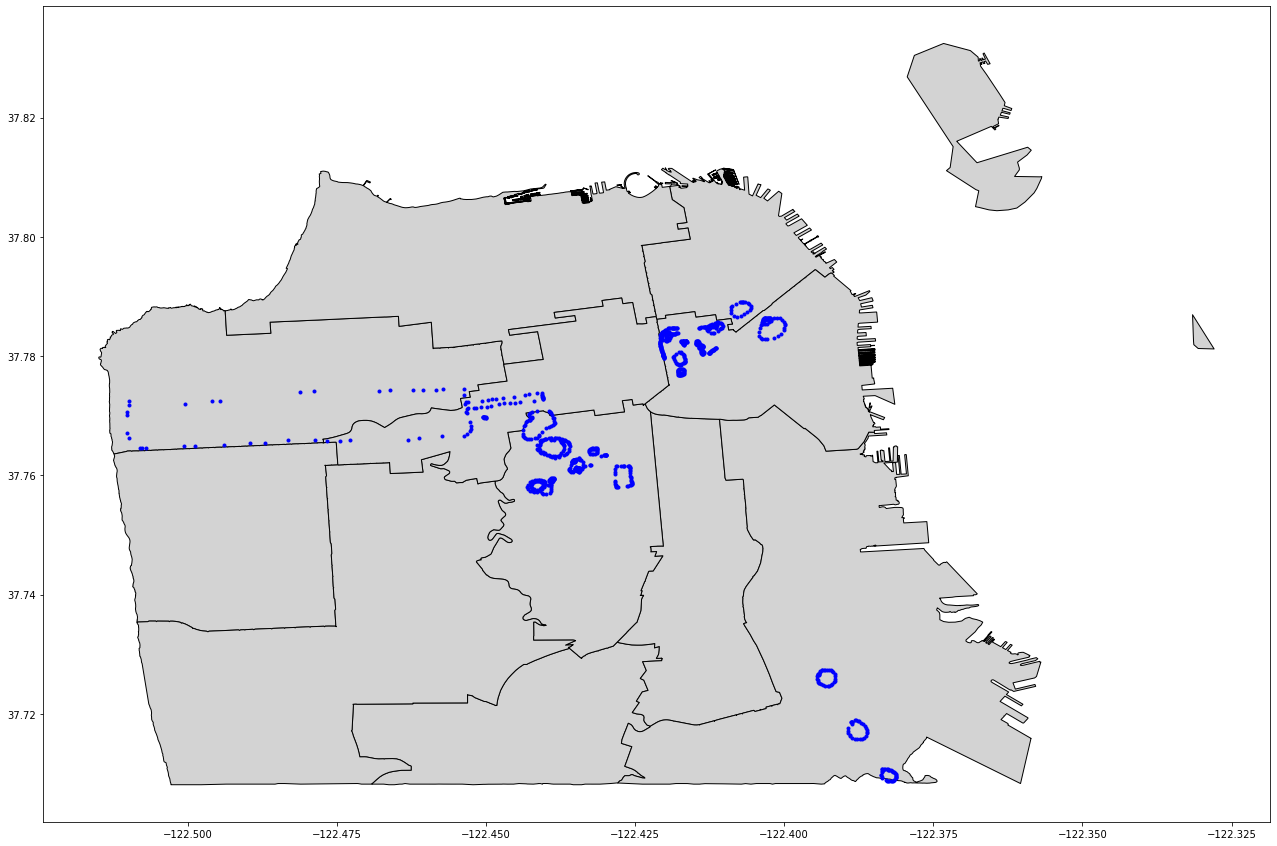

In [20]:

fig, ax = plt.subplots(figsize=(30,15))

shp_sd.plot(ax=ax, color="lightgray", edgecolor="black");


plt.scatter(df16.loc[df16
                     ['safe'] == 1, 'lon'], 
         df16.loc[df16['safe'] == 1, 'lat'], 
            marker='.', color='blue')

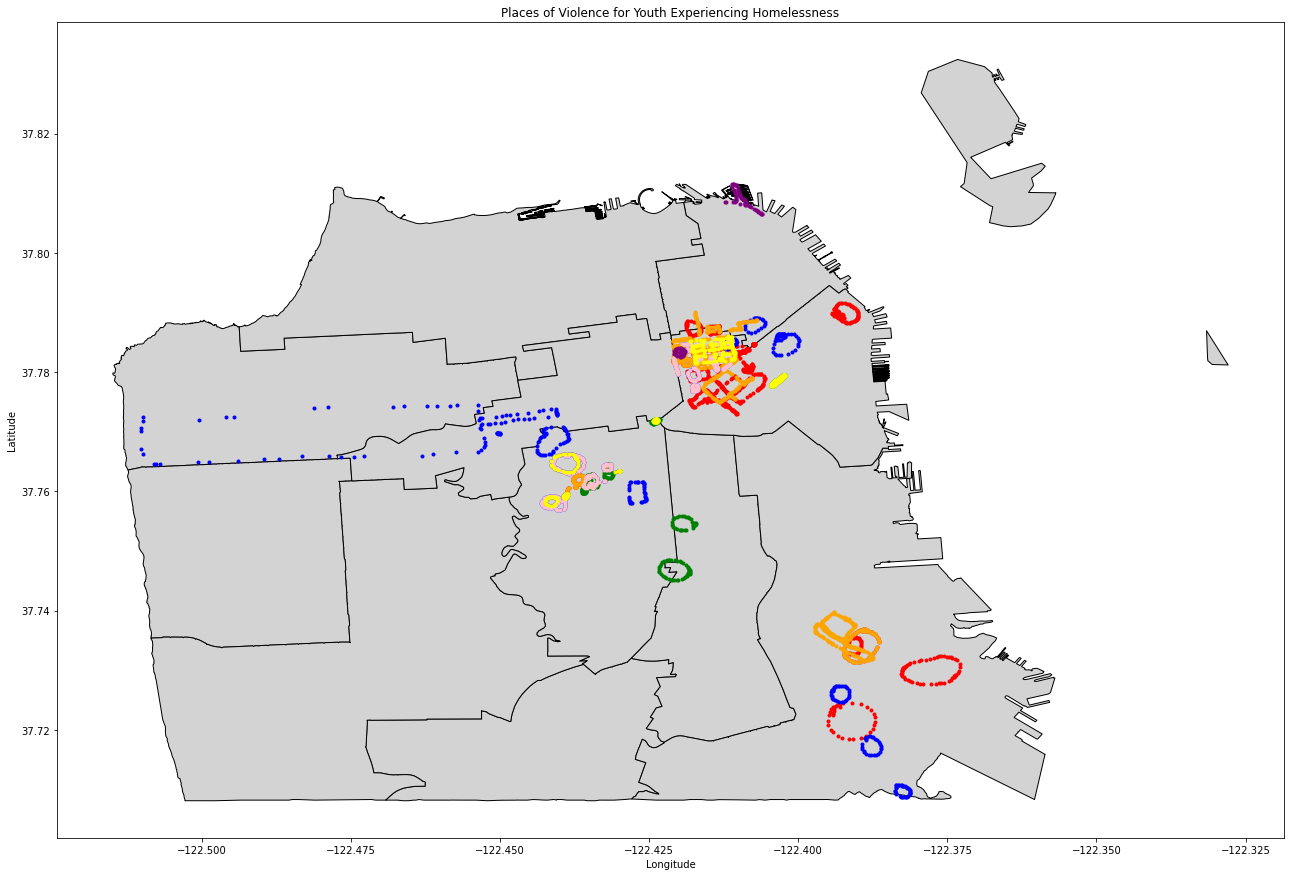

In [21]:
fig, ax = plt.subplots(figsize=(30,15))

shp_sd.plot(ax=ax, color="lightgray", edgecolor="black");

plt.scatter(df16.loc[df16
                     ['unsafe'] == 1, 'lon'], 
         df16.loc[df16['unsafe'] == 1, 'lat'], 
            marker='.', color='red')
plt.scatter(df16.loc[df16
                     ['safe'] == 1, 'lon'], 
         df16.loc[df16['safe'] == 1, 'lat'], 
            marker='.', color='blue')
plt.scatter(df16.loc[df16
                     ['resources'] == 1, 'lon'], 
         df16.loc[df16['resources'] == 1, 'lat'], 
            marker='.', color='green')
plt.scatter(df16.loc[df16
                     ['drugs'] == 1, 'lon'], 
         df16.loc[df16['drugs'] == 1, 'lat'], 
            marker='.', color='orange')
plt.scatter(df16.loc[df16
                     ['time_day'] == 1, 'lon'], 
         df16.loc[df16['time_day'] == 1, 'lat'], 
            marker='.', color='pink')
plt.scatter(df16.loc[df16
                     ['time_night'] == 1, 'lon'], 
         df16.loc[df16['time_night'] == 1, 'lat'], 
            marker='.', color='purple')
plt.scatter(df16.loc[df16
                     ['sleep'] == 1, 'lon'], 
         df16.loc[df16['sleep'] == 1, 'lat'], 
            marker='.', color='yellow')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Places of Violence for Youth Experiencing Homelessness')
plt.show()

In [22]:
df16unsafe = df16.loc[df16['unsafe'] == 1]
SF_COORDINATES = (37.76, -122.45)
from folium.plugins import HeatMap

 

# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
# Get x and y coordinates for each point

# Create a list of coordinate pairs
locations = list(zip(df16["lat"], df16["lon"]))

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(map)
HeatMap(locations).add_to(map)

map.save('heatMapFM.html')
# Show map
map

In [23]:
df16unsafe = df16.loc[df16['unsafe'] == 1]
SF_COORDINATES = (37.76, -122.45)
from folium.plugins import HeatMap

 

# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
# Get x and y coordinates for each point

# Create a list of coordinate pairs
locations = list(zip(df16unsafe["lat"], df16unsafe["lon"]))

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(map)
HeatMap(locations).add_to(map)

# Show map
map

In [50]:
from branca.element import Figure
fig=Figure(width=1000,height=1000)
df16unsafe = df16.loc[df16['unsafe'] == 1]
fig2=Figure(width=850,height=500)
m2=folium.Map(location=(37.76, -122.45))
fig2.add_child(m2)

# Create a list of coordinate pairs
locations = list(zip(df16unsafe["lat"], df16unsafe["lon"]))

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)
marker_cluster.add_to(m2)
HeatMap(locations).add_to(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2